In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('EuCitiesTemperatures.csv')
df.head()

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79


##### Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [3]:
df_mean_countries_latitude = dict(round(df.groupby('country')['latitude'].mean(),2))
df_mean_countries_longitude = dict(round(df.groupby('country')['longitude'].mean(),2))
df_mean_countries_latitude

{'Albania': 41.12,
 'Andorra': 42.5,
 'Austria': 47.85,
 'Belarus': 52.61,
 'Belgium': 51.22,
 'Bosnia and Herzegovina': 43.85,
 'Bulgaria': 43.05,
 'Croatia': 45.33,
 'Czech Republic': 49.7,
 'Denmark': 55.4,
 'Estonia': 59.43,
 'Finland': 61.78,
 'France': 47.13,
 'Germany': 50.59,
 'Greece': 38.2,
 'Hungary': 47.24,
 'Ireland': 53.3,
 'Italy': 42.08,
 'Latvia': 56.95,
 'Lithuania': 55.72,
 'Macedonia': 42.0,
 'Moldova': 47.76,
 'Montenegro': 42.47,
 'Netherlands': 52.78,
 'Norway': 62.39,
 'Poland': 52.48,
 'Portugal': 38.72,
 'Romania': 45.52,
 'Serbia': 44.82,
 'Slovakia': 48.44,
 'Slovenia': 46.06,
 'Spain': 39.95,
 'Sweden': 60.88,
 'Switzerland': 47.48,
 'Turkey': 39.17,
 'Ukraine': 48.71,
 'United Kingdom': 53.55}

In [4]:
df.latitude = df.latitude.fillna(df.country.map(df_mean_countries_latitude))
df.longitude = df.longitude.fillna(df.country.map(df_mean_countries_longitude))

In [5]:
df.head()

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79


##### Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [6]:
df_countries = df.loc[(df['latitude'] >= 40) & (df['latitude'] <= 60) & (df['longitude'] >= 15) & (df['longitude'] <= 30)]

In [7]:
df_countries['city']

0         Elbasan
6          Vienna
7           Minsk
8           Orsha
9           Pinsk
          ...    
165         Bursa
169        Edirne
183      Tekirdag
186    Chernivtsi
193         Rivne
Name: city, Length: 63, dtype: object

In [8]:
df_max = pd.DataFrame({'count':df_countries.groupby('country')['city'].count()}).reset_index()
df_max

,country,count
0,Albania,1
1,Austria,1
2,Belarus,6
3,Bulgaria,5
4,Croatia,1
5,Czech Republic,2
6,Estonia,2
7,Hungary,4
8,Italy,2
9,Latvia,2


In [9]:
df_max.loc[df_max['count'] == df_max['count'].max()]

,country,count
14,Poland,9
15,Romania,9


##### Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no). For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes')

In [10]:
### We will make new column which will contain EU + coast line
df['eu_coastline'] = df['EU'] + df['coastline']

In [11]:
df.head()

,city,country,population,EU,coastline,latitude,longitude,temperature,eu_coastline
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18,noyes
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN,nono
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54,yesno
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91,yesno
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79,yesno


In [12]:
### making dictionary of mean of eu + coastline
dic = dict(round(df.groupby('eu_coastline')['temperature'].mean(),2))
dic

{'nono': 7.48, 'noyes': 9.73, 'yesno': 7.54, 'yesyes': 10.31}

In [13]:
df.temperature = df.temperature.fillna(df.eu_coastline.map(dic))
## dropping extra column we created
df.head()

,city,country,population,EU,coastline,latitude,longitude,temperature,eu_coastline
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18,noyes
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48,nono
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54,yesno
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91,yesno
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79,yesno


## Visualization

##### Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

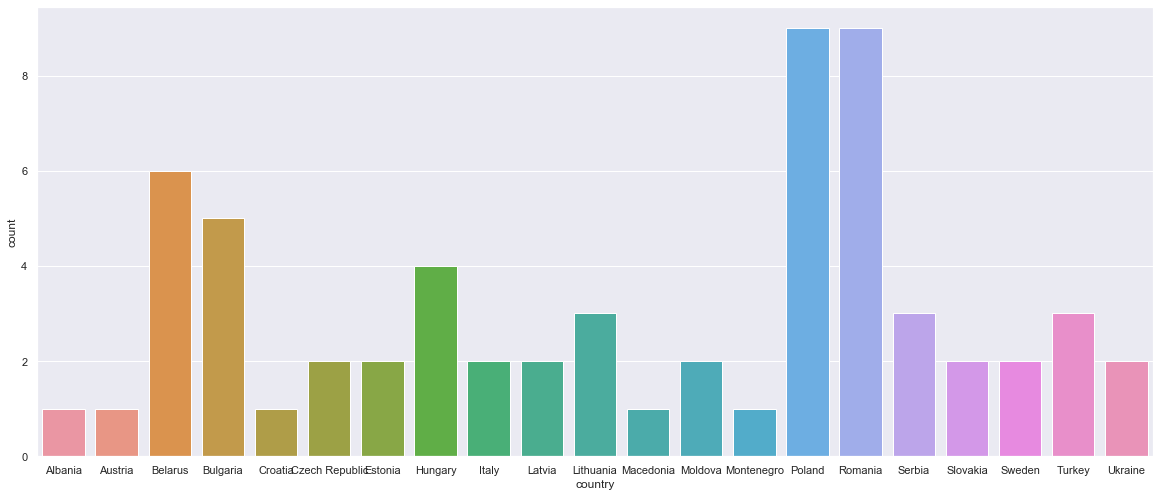

In [14]:
sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.barplot(x="country", y="count", data=df_max)

##### Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

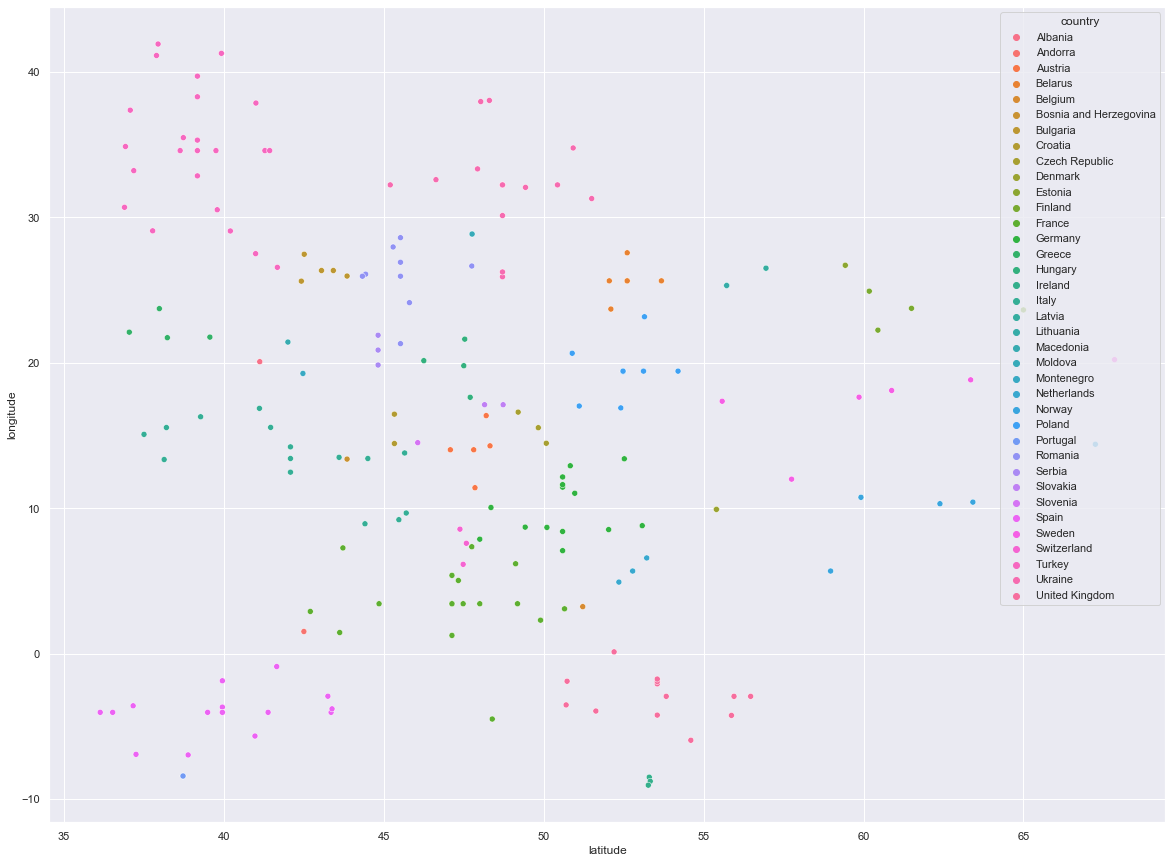

In [15]:
sns.set(rc={'figure.figsize':(20,15)})
sns.scatterplot(data=df, x="latitude", y="longitude", hue="country")

##### The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

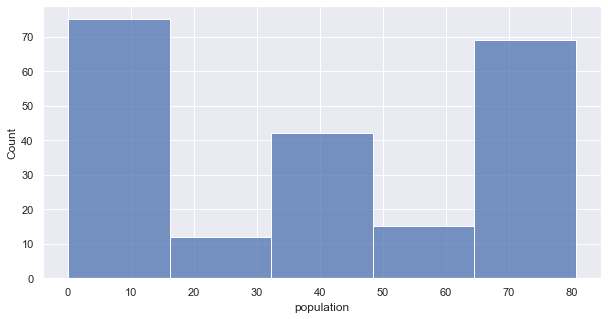

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=df, x="population", bins=5)

Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

In [17]:
yesyes = df.loc[df['eu_coastline'] == 'yesyes']
yesno = df.loc[df['eu_coastline'] == 'yesno']
noyes = df.loc[df['eu_coastline'] == 'noyes']
nono = df.loc[df['eu_coastline'] == 'nono']

In [18]:
def colorplot(lis):
    color = []
    for i in lis:
        if i > 10:
            color.append('red')
        elif i < 6:
            color.append('blue')
        elif i >= 6 and i<= 10:
            color.append('orange')
    return color

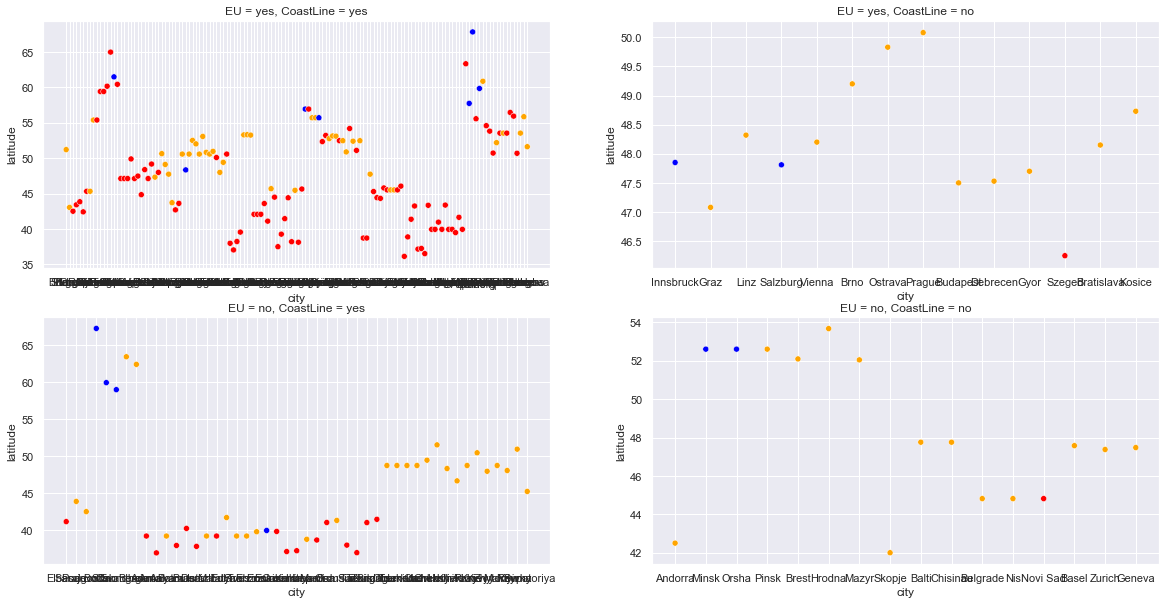

In [19]:
fig, axs = plt.subplots(2,2, figsize=(20,10))

color = colorplot(yesyes['temperature'])
axs[0,0].set_title('EU = yes, CoastLine = yes')
sns.scatterplot(x='city', y='latitude', data=yesyes, ax=axs[0,0],c=color)

color = colorplot(yesno['temperature'])
axs[0,1].set_title('EU = yes, CoastLine = no')
sns.scatterplot(x='city', y='latitude', data=yesno, ax=axs[0,1],c=color)

color = colorplot(noyes['temperature'])
axs[1,0].set_title('EU = no, CoastLine = yes')
sns.scatterplot(x='city', y='latitude', data=noyes, ax=axs[1,0],c=color)

color = colorplot(nono['temperature'])
axs[1,1].set_title('EU = no, CoastLine = no')
sns.scatterplot(x='city', y='latitude', data=nono, ax=axs[1,1],c=color)
